In [47]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import pearsonr
from skimage.filters import threshold_otsu
import tifffile as tf
plt.rcParams.update({'font.size': 16})

In [35]:
folder = '/Users/cuenca/Documents/Predoc Course/Pics/s3'

ch1 = glob.glob(folder + '/C1*.tif') 
ch2 = glob.glob(folder + '/C2*.tif') 
data1 = glob.glob(folder + '/ValuesC1*.csv') 
data2 = glob.glob(folder + '/ValuesC2*.csv') 

In [36]:
ch1 = tf.imread(ch1)
ch2 = tf.imread(ch2)
bl1 = pd.read_csv(data1[0])['Y'].values
bl2 = pd.read_csv(data2[0])['Y'].values

In [37]:
bln1 = bl1/bl1[0]
bln2 = bl2/bl2[0]


chn1, chn2 = [], []
for i, c in enumerate(ch1):
    chn1.append(c*bln1[i])
    chn2.append(ch2[i]*bln2[i])



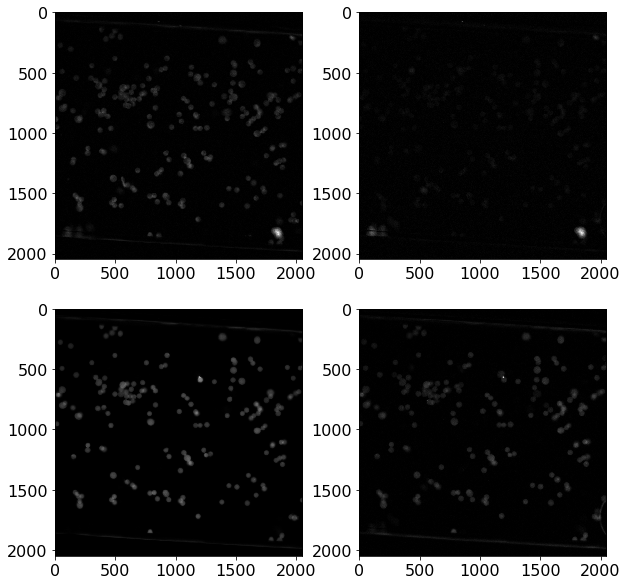

In [38]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(221)
plt.imshow(chn1[0], 'gray')

plt.subplot(222)
plt.imshow(chn1[-1], 'gray')

plt.subplot(223)
plt.imshow(chn2[0], 'gray')

plt.subplot(224)
plt.imshow(chn2[-1], 'gray')
plt.show()

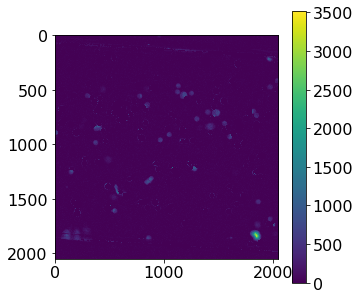

In [72]:
subs = chn1[0]/np.mean(np.mean(chn1[0]))-chn2[0]/np.mean(np.mean(chn2[0]))
bin_neg = subs >= 0
neg = bin_neg*chn1[0]
plt.rcParams["figure.figsize"] = [5, 5]
plt.imshow(neg, vmin=0)
plt.colorbar()
plt.show()

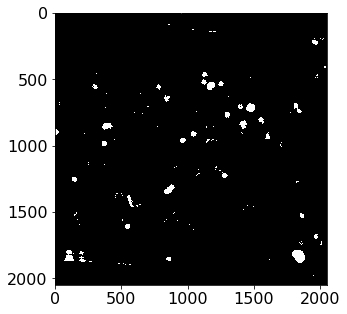

In [66]:

threshold_global_otsu = threshold_otsu(neg)
global_otsu = neg >= threshold_global_otsu
plt.imshow(global_otsu, 'gray')
plt.show()

In [50]:
subs

array([0.18798002, 0.12062155, 0.02732552, ..., 0.62381822, 0.82102687,
       0.03951024])